# Afternoon Activity - Day 8

#### This notebook was developed by [Zeljko Ivezic](http://faculty.washington.edu/ivezic/) for the 2021 data science class at the University of Sao Paulo and it is available from [github](https://github.com/ivezic/SaoPaulo2021/blob/main/notebooks/Activity8.ipynb).

## Problem 1 

Use Kernel Density Estimation with a top-hat, Gaussian, and exponential kernel on the color-magnitude diagrams (CMDs) of the two data sets (`Field A` and `Field B`) from Homework 7. Make the analog of Figure 6.3 from the textbook (the code for that figure is included below), but with the CMDs in each panel (i.e., $g-r$ on the $x$, and $g$ on the $y$ axis). In astronomy, such figures are called Hess diagrams. 

Experiment with different kernel bandwidths, plotting one that visually seems "best" (i.e., a good balance of bias vs. variance) for each kernel.

Don't forget to change the figure size so that individual panels have aspect ratios closer to what is common for color-magnitude diagrams (i.e., x:y $\approx$ 4:6 or so).


## Problem 2
Investigate what you can learn about a simulated dataset with 4 Gaussian components, with observational errors, using GMM fits with the number of components given by the BIC criterion. 

Experiment by changing the sample size and measurement errors.


## Problem 3 

PCA applied to 4-D data for variable stars from the SDSS and LINEAR surveys:

- SDSS u-g and g-i colors,

- LINEAR variability period (logP) and variability amplitude (A).

This is the same data sample as in Problem 2 from Afternoon Activity - Day 7. 

Read the data, run PCA (with four components), and then

a) plot P2 vs. P1 diagram, color-coded using P3 and P4 as in Homework 1. From Homework 1, retain the g-i vs. u-g and amplitude vs. logP diagrams, color-coded by the u-g and g-i colors, for visual comparison.  

b) plot the g-i vs. u-g, amplitude vs. logP, P2 vs. P1 and P4 vs. P3 diagrams, color-coded using P1 and P2. 

Comment what insights, if any, did PCA analysis bring.

## Problem 1: Hess diagrams with SDSS data for the Monoceros Stream

In [10]:
import pandas as pd
fieldA = pd.read_csv('data/fieldA.csv')
fieldB = pd.read_csv('data/fieldB.csv')

# Add a column for color
fieldA['g-r'] = fieldA.g - fieldA.r
fieldB['g-r'] = fieldB.g - fieldB.r

In [104]:
%matplotlib inline

import numpy as np
from matplotlib import pyplot as plt
from matplotlib.colors import LogNorm, Normalize

from scipy.spatial import cKDTree
from scipy.stats import gaussian_kde

from astroML.datasets import fetch_great_wall

from sklearn.neighbors import KernelDensity

#----------------------------------------------------------------------
# This function adjusts matplotlib settings for a uniform feel in the textbook.
# Note that with usetex=True, fonts are rendered with LaTeX.  This may
# result in an error if LaTeX is not installed on your system.  In that case,
# you can set usetex to False.
from astroML.plotting import setup_text_plots
setup_text_plots(fontsize=10, usetex=True)

def make_plots(X, h):
    #------------------------------------------------------------
    # Create  the grid on which to evaluate the results
    Nx = 250
    Ny = 250
    xmin, xmax = (-0.5, 2)
    ymin, ymax = (22, 14)

    #------------------------------------------------------------
    # Evaluate for several models
    Xgrid = np.vstack(map(np.ravel, np.meshgrid(np.linspace(xmin, xmax, Nx),
                                                np.linspace(ymin, ymax, Ny)))).T

    kernels = ['gaussian', 'tophat', 'exponential']
    dens = []

    kde1 = KernelDensity(h, kernel='gaussian')
    log_dens1 = kde1.fit(X).score_samples(Xgrid)
    dens1 = X.shape[0] * np.exp(log_dens1).reshape((Ny, Nx))

    kde2 = KernelDensity(h, kernel='tophat')
    log_dens2 = kde2.fit(X).score_samples(Xgrid)
    dens2 = X.shape[0] * np.exp(log_dens2).reshape((Ny, Nx))

    kde3 = KernelDensity(h, kernel='exponential')
    log_dens3 = kde3.fit(X).score_samples(Xgrid)
    dens3 = X.shape[0] * np.exp(log_dens3).reshape((Ny, Nx))

    #------------------------------------------------------------
    # Plot the results
    fig = plt.figure(figsize=(10, 15))
    fig.subplots_adjust(left=0.12, right=0.95, bottom=0.2, top=0.9,
                        hspace=0.1, wspace=0.1)

    # First plot: scatter the points
    ax1 = plt.subplot(221)
    ax1.scatter(X[:, 0], X[:, 1], s=1, lw=0, c='k')
    ax1.text(0.95, 0.9, "input", ha='right', va='top',
             transform=ax1.transAxes,
             bbox=dict(boxstyle='round', ec='k', fc='w'))

    # Second plot: gaussian kernel
    ax2 = plt.subplot(222)
    ax2.imshow(dens1, origin='lower', aspect='auto', norm=Normalize(),
               extent=(xmin, xmax, ymin, ymax), cmap=plt.cm.binary)
    ax2.text(0.95, 0.9, "Gaussian $(h=%.2f)$" % h, ha='right', va='top',
             transform=ax2.transAxes,
             bbox=dict(boxstyle='round', ec='k', fc='w'))

    # Third plot: top-hat kernel
    ax3 = plt.subplot(223)
    ax3.imshow(dens2, origin='lower', aspect='auto', norm=Normalize(),
               extent=(xmin, xmax, ymin, ymax), cmap=plt.cm.binary)
    ax3.text(0.95, 0.9, "top-hat $(h=%.2f)$" % h, ha='right', va='top',
             transform=ax3.transAxes,
             bbox=dict(boxstyle='round', ec='k', fc='w'))

    # Fourth plot: exponential kernel
    ax4 = plt.subplot(224)
    ax4.imshow(dens3, origin='lower', aspect='auto', norm=Normalize(),
               extent=(xmin, xmax, ymin, ymax), cmap=plt.cm.binary)
    ax4.text(0.95, 0.9, "exponential $(h=%.2f)$" % h, ha='right', va='top',
             transform=ax4.transAxes,
             bbox=dict(boxstyle='round', ec='k', fc='w'))

    for ax in [ax1, ax2, ax3, ax4]:
        ax.set_xlim(xmin, xmax)
        ax.set_ylim(ymin, ymax)

    for ax in [ax1, ax2]:
        ax.xaxis.set_major_formatter(plt.NullFormatter())

    for ax in [ax3, ax4]:
        ax.set_xlabel('$g-r$')

    for ax in [ax2, ax4]:
        ax.yaxis.set_major_formatter(plt.NullFormatter())

    for ax in [ax1, ax3]:
        ax.set_ylabel('$g$')

    plt.show()
    
    return dens1

## Warning: these steps take a few minutes each!

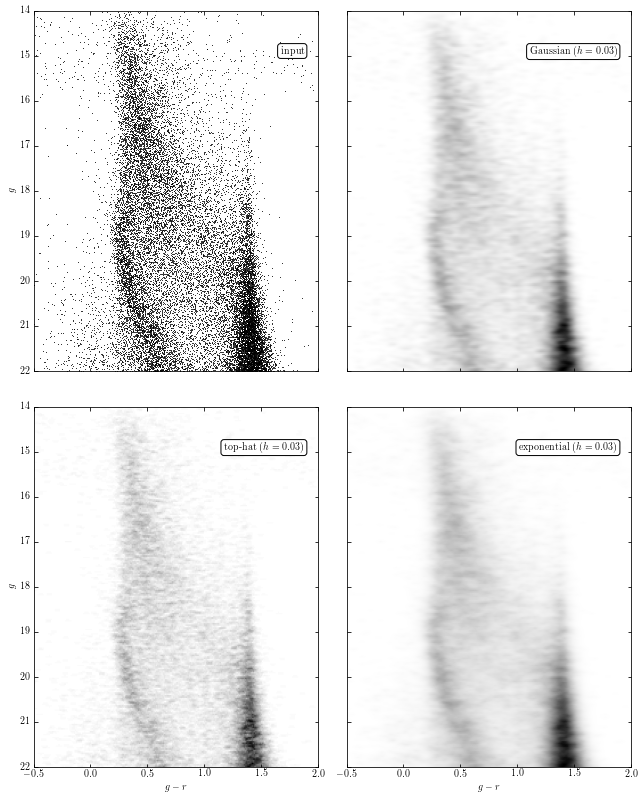

In [105]:
densityB = make_plots(fieldB.as_matrix(['g-r','g']), 0.03)

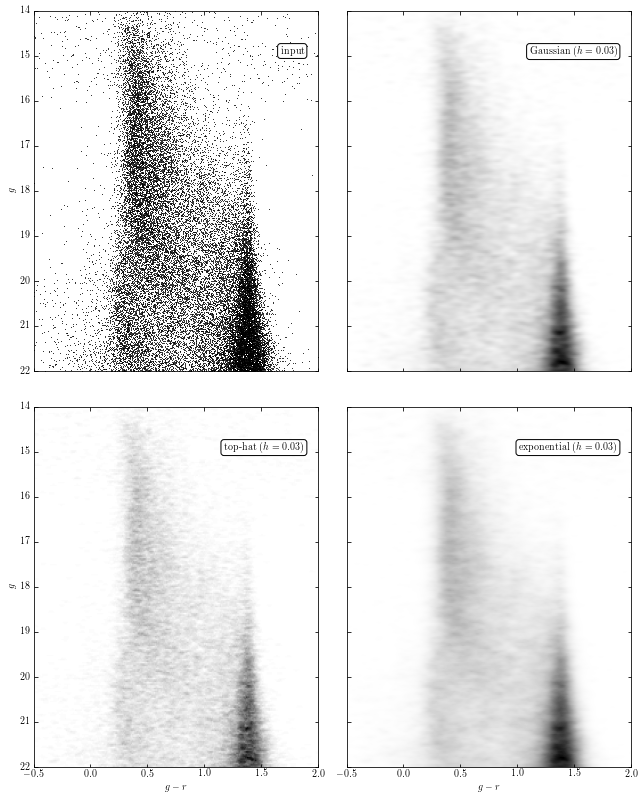

In [106]:
densityA = make_plots(fieldA.as_matrix(['g-r','g']), 0.03)

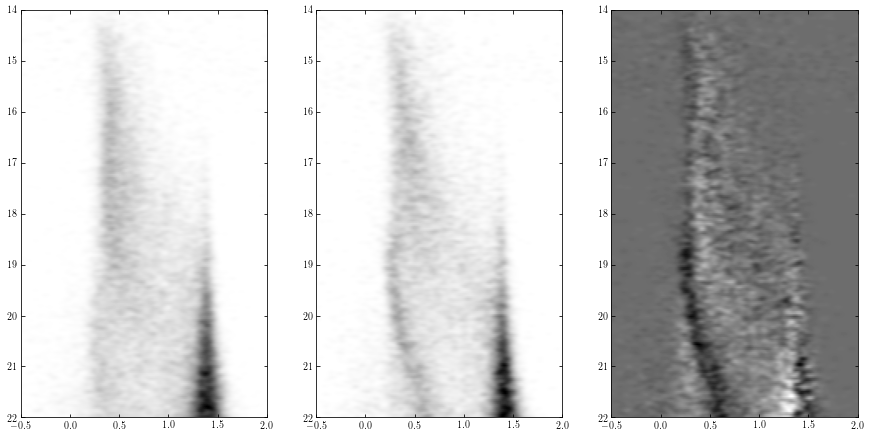

In [122]:
fig = plt.figure(figsize=(15, 7.5))
xmin, xmax = (-0.5, 2)
ymin, ymax = (22, 14)

ax = plt.subplot(131)
ax.imshow(densityA, origin='lower', aspect='auto', norm=Normalize(), 
              extent=(xmin, xmax, ymin, ymax), cmap=plt.cm.binary)

ax = plt.subplot(132)
ax.imshow(densityB, origin='lower', aspect='auto', norm=Normalize(), 
              extent=(xmin, xmax, ymin, ymax), cmap=plt.cm.binary)

ax = plt.subplot(133)
# note renormalization of the second image (fieldA)! 
ax.imshow(densityB-0.8*densityA, origin='lower', aspect='auto', norm=Normalize(), 
              extent=(xmin, xmax, ymin, ymax), cmap=plt.cm.binary)

plt.show()

## Problem 2: a dataset with 4 Gaussian components 

**Gaussian mixture model** is a relatively simple and straightfoward numerical method on obtaining data likelihood function, and expectation maximization algorithm for maximizing the likelihood.  
The likelihood of a datum $x_i$ for a Gaussian mixture model is given by  

$$p(x_i|\theta) = \sum_{j=1}^{M} \alpha_{j}\mathcal{N}(\mu_j, \sigma_j)$$  

where vector of parameters $\theta$ is estimated from Gaussian with parameters $\mu_j$ and $\sigma_j$.   
$\alpha_j$ is the normalization factor for each Gaussian, with $\sum_{j=1}^{M} \alpha_{j} = 1$.   
M is given.
  
Both **Akaike information criterion (AIC)** and **Bayesian information criterion (BIC)** are scoring systems for model comparisons in classical statistics dealing with models with different numbers of free parameters.  

Specifically, **AIC** is computed as

$$AIC \equiv -2 ln(L^0(M)) + 2k + \frac{2k(k+1)}{N-k-1}$$  

**BIC** is computed as

$$BIC \equiv -2ln[L^0(M)] + k lnN$$  
  
In this notebook, we are going to apply Gaussian mixture model on a dataset of stellar metallicity. Then we will use AIC, and BIC for model comparisons, and then plot the best scored model in BIC.   

In [140]:
### Modeled after astroML book figure 4.2  
from sklearn.mixture import GaussianMixture as GMM
setup_text_plots(fontsize=18, usetex=True)

def doGMM(Ndata, noiseStd=0.00000001):
    #------------------------------------------------------------
    # Set up the dataset by drawing samples from Gaussians.
    #  We'll use scikit-learn's Gaussian Mixture Model to sample
    #  data from a mixture of 1-D Gaussians.  The usual way of using
    #  this involves fitting the mixture to data: we'll see that
    #  below.  Here we'll set the internal means, covariances,
    #  and weights by-hand and then generate a sample of requested 
    #  size Ndata. 
    N1 = int(0.2*Ndata)
    N2 = int(0.3*Ndata)
    N3 = int(0.2*Ndata)
    N4 = Ndata - (N1+N2+N3)
    random_state = np.random.RandomState(seed=1)
    X = np.concatenate([random_state.normal(-4, 1.1, N1),
                    random_state.normal(-1, 1.0, N2),
                    random_state.normal(0.9, 0.7, N3),
                    random_state.normal(3, 1.0, N4)]).reshape(-1, 1)
    X = np.random.normal(X, noiseStd)

    #------------------------------------------------------------
    # Learn (train) the best-fit GMM models
    # Here we'll use GMM in the standard way: the fit() method
    # uses an Expectation-Maximization approach to find the best
    # mixture of Gaussians for the data

    # fit models with 1-10 components
    N = np.arange(1, 11)
    models = [None for i in range(len(N))]
    for i in range(len(N)):
        models[i] = GMM(N[i]).fit(X)
    # compute the BIC for each model
    BIC = [m.bic(X) for m in models]

    #------------------------------------------------------------
    # Plot the results
    #  We'll use two panels:
    #   1) data + best-fit mixture
    #   2) BIC vs number of components 

    fig = plt.figure(figsize=(12, 7))
    fig.subplots_adjust(left=0.12, right=0.97,
                    bottom=0.21, top=0.9, wspace=0.5)


    # plot 1: data + best-fit mixture
    ax = fig.add_subplot(121)
    M_best = models[np.argmin(BIC)]

    x = np.linspace(-10, 10, 1000)
    logprob = M_best.score_samples(x.reshape(-1, 1))
    responsibilities = M_best.predict_proba(x.reshape(-1, 1))

    pdf = np.exp(logprob)
    pdf_individual = responsibilities * pdf[:, np.newaxis]

    ax.hist(X, 'auto', density=True, histtype='stepfilled', alpha=0.4)
    ax.plot(x, pdf, '-k')
    ax.plot(x, pdf_individual, '--k')
    ax.text(0.04, 0.96, "Best-fit Mixture",
        ha='left', va='top', transform=ax.transAxes)
    ax.set_xlabel('$x$')
    ax.set_ylabel('$p(x)$')

    # plot 2: BIC
    ax = fig.add_subplot(122)
    ax.plot(N, BIC, '--k')
    ax.set_xlabel('n. components')
    ax.set_ylabel('BIC')

    ibest = np.argmin(BIC)
    print(BIC[ibest-1]-BIC[ibest], BIC[ibest], BIC[ibest+1]-BIC[ibest])
    plt.show()

988.9386657014838 471778.09742698993 445.07156725693494


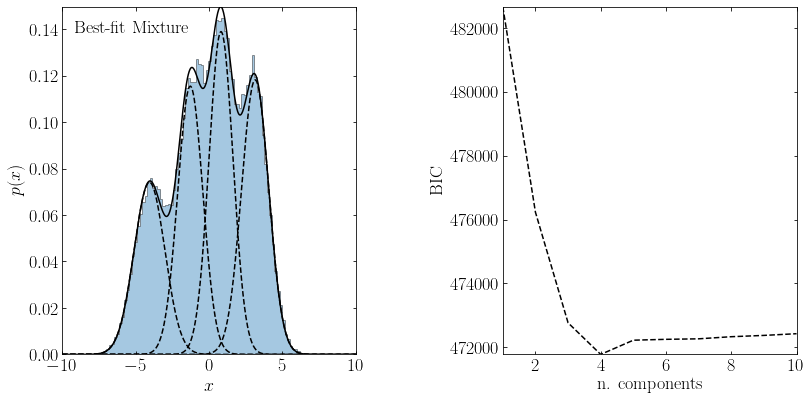

CPU times: user 52.6 s, sys: 7.16 s, total: 59.7 s
Wall time: 21.3 s


In [143]:
# let's see what we have, using a huge number of data points
%time doGMM(100000)   # about 4 min for 1 million points

4.709128273083252 1448.7300689612027 15.353745274904668


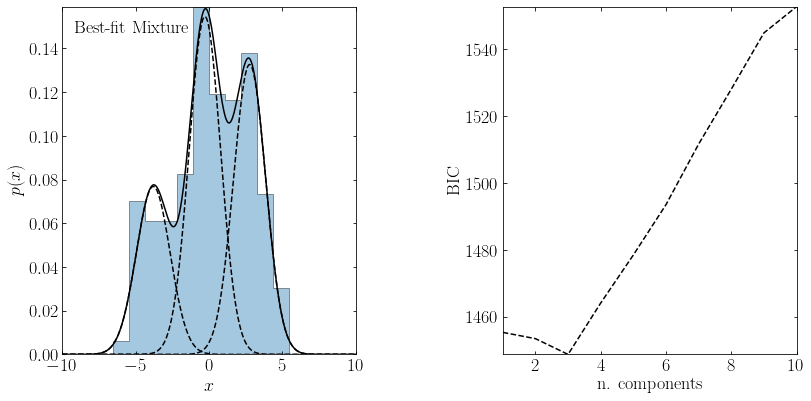

CPU times: user 1.17 s, sys: 42 ms, total: 1.21 s
Wall time: 358 ms


In [141]:
# what if we have a much smaller sample?
%time doGMM(300)  

##  How do we interpret BIC? 

The figure above (right panel) shows that the 3-component model has a BIC lower
by about 15 than the 4-component model. Is this sufficient evidence to claim 
that the former is really really better choice than the latter? 

As you may recall,  

**How do we interpret the values of the odds ratio in practice? **
Jeffreys proposed a five-step scale for interpreting the odds ratio, where $O_{21} > 10$ represents “strong” evidence in favor of $M_2$ ($M_2$ is ten times more probable than $M_1$), and $O_{21} > 100$ is “decisive” evidence ($M_2$ is one hundred times more probable than $M_1$). When $O_{21} < 3$, the evidence is “not worth more than a bare mention.”

Given the relationship between the BIC and $O_{21},$ 
$$    \Delta BIC \equiv BIC_2 - BIC_1 = -2\,\ln(O_{21}) $$ 
we have that $O_{21}=10$ corresponds to $\Delta BIC= -4.6$ and $O_{21}=100$ corresponds to $\Delta BIC = -9.2$.
For completeness, $|\Delta BIC|<2$ is “not worth more than a bare mention.”

Therefore, **$|\Delta BIC| = 5$ corresponds to “strong” evidence and $|\Delta BIC| = 10$ to “decisive” evidence.**

Another way to interpret $|\Delta BIC| = 15$ is to say that the model with 3 components is $exp(15/2) \approx 2000$ times more probable than the model with 4 components.

We can conclude that the figure shows **decisive** evidence in favor of the 3-component model. That is,
you should **not** argue that there are 4 peaks in the left panel! Altough we **did** draw that dataset
from a model with 4 components, a sample of 300 values is insufficient to 
*discover* more than 3 components!

What if we increase the sample size? 

23704.053165973728 23674.466772766093 23724.637249572796


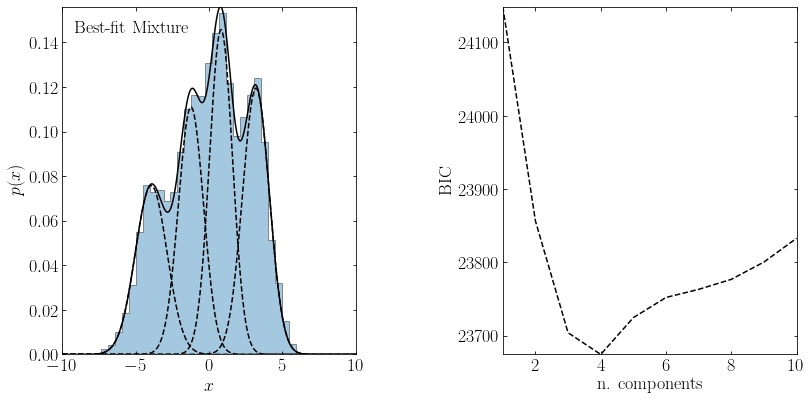

In [125]:
%time doGMM(5000)

Conclusion Large sample size helps! I love surveys, I love LSST!

But one more thing: let's convolve our data with an arbitrary Gaussian to simulate measurement errors.



25479.607645024524 25438.47789295382 25467.583163983345


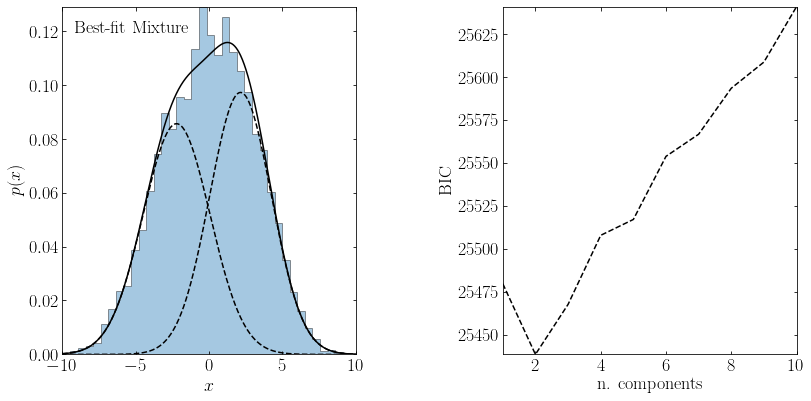

In [126]:
%time doGMM(5000,1.5)

**Conclusion** If you badly "blur" your sample, of course you will not see the fine
structure (i.e. many components)! 

Therefore, even with large samples, you still need to have precise and well calibrated 
measurements! Another reason to love LSST!

## Problem 3: Principal Component Analysis


First obtain LINEAR data for 6,146 stars using astroML built-in function: 

In [127]:
from astroML.datasets import fetch_LINEAR_geneva
data = fetch_LINEAR_geneva()
# N.B. this is a 7-dimensional dataset
ug = data['ug']
gi = data['gi']
logP = data['logP']
A = data['amp']

A few helper routines before starting with the PCA...

In [128]:
def black_bg_subplot(*args, **kwargs):
# copied from http://www.astroml.org/book_figures/chapter1/fig_moving_objects_multicolor.html
    """Create a subplot with black background"""
    kwargs['facecolor'] = 'k'
    ax = plt.subplot(*args, **kwargs)

    # set ticks and labels to white
    for spine in ax.spines.values():
        spine.set_color('w')

    for tick in ax.xaxis.get_major_ticks() + ax.yaxis.get_major_ticks():
        for child in tick.get_children():
            child.set_color('w')

    return ax

def compute_color2(vec1, vec2, kG=5.0, aG=0.8, kB=2.0, aB=1.2):
# adopted from http://www.astroml.org/book_figures/chapter1/fig_moving_objects_multicolor.html
    """
    Compute the scatter-plot color using code adapted from astroML
    http://www.astroml.org/book_figures/chapter1/fig_moving_objects_multicolor.html
    """
    # define the base color scalings
    # fudge factors aG and aB control the "redness" and "greenness"
    # fudge factors kG and kB control dynamic range of color coding
    # both a and k factors need some experimenting for the best results
    R = np.ones_like(vec1)
    G = aG * 10**(kG*vec1) 
    B = aB * 10**(kB*vec2) 

    # normalize color of each point to its maximum component
    RGB = np.vstack([R, G, B])
    RGB /= RGB.max(0)

    # return an array of RGB colors, which is shape (n_points, 3)
    return RGB.T

Text(0, 0.5, '${\\rm Amplitude \\,\\, (mag)}$')

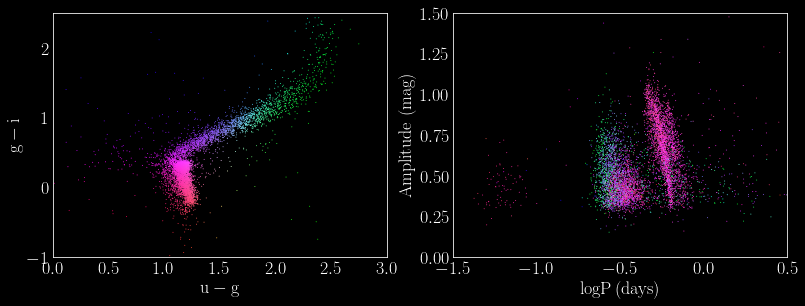

In [130]:
# first plot diagrams as in HW #1
ugNorm = (ug-1.5)/(3.0-0.0)
giNorm = (gi-0.5)/(2.5+1.0)
color = compute_color2(ugNorm, giNorm, 5.0, 0.8, 2.0, 1.2)

# set up the plot
fig = plt.figure(figsize=(12, 9), facecolor='k')
fig.subplots_adjust(left=0.1, right=0.95, wspace=0.2,
                    bottom=0.1, top=0.93)

# plot the color-color plot
ax1 = black_bg_subplot(221)
ax1.scatter(ug, gi, c=color, s=0.9, lw=0)
ax1.set_xlim(0.0, 3.0)
ax1.set_ylim(-1.0, 2.5)
ax1.set_xlabel(r'${\rm u-g}$', color='w')
ax1.set_ylabel(r'${\rm g-i}$', color='w')

# plot the A vs. logP plot
ax2 = black_bg_subplot(222)
ax2.scatter(logP, A, c=color, s=0.9, lw=0)
ax2.set_xlim(-1.5, 0.5)
ax2.set_ylim(0.0, 1.5)
ax2.set_xlabel(r'${\rm logP \, (days)}$', color='w')
ax2.set_ylabel(r'${\rm Amplitude \,\, (mag)}$', color='w')

#### note 4-dimensional color coding: the symbol color is determined by the position in the 
left panel and used in the right panel


## And now do the PCA analysis...

In [131]:
from sklearn.decomposition import PCA
X = np.column_stack((ug, gi, logP, A))
pca = PCA(n_components=4, whiten=False)  
pca.fit(X)  # call the work horse 
comp = pca.transform(X) # compute the subspace projection of X
mean = pca.mean_ # length 4 mean of the data
components = pca.components_ # 4 x 4 matrix of components
var = pca.explained_variance_ # the length 4 array of eigenvalues
var_rat = pca.explained_variance_ratio_
# and now generate principal axes values
P1 = comp[:,0]
P2 = comp[:,1]
P3 = comp[:,2]
P4 = comp[:,3]
print(np.mean(P1), np.min(P1), np.max(P1))
print(np.mean(P2), np.min(P2), np.max(P2))
print(np.mean(P3), np.min(P3), np.max(P3))
print(np.mean(P4), np.min(P4), np.max(P4))

-1.1653548285814855e-15 -1.1236516902357903 100.51900980622689
-8.508940018214021e-16 -2.151567975599691 3.0631018145734092
-2.1561376540718952e-16 -1.8424086006079998 4.116816850760959
-2.2659677222417776e-16 -1.3373569356113664 1.9329680840429546


Now compute RGB color based on P3 and P4

In [132]:
## and now use principal coordinates 
P3norm = P3/3.0
P4norm = P4/3.0 
# for the last four parameters, see compute_color2 above
colorP = compute_color2(P3norm, P4norm, 5.0, 0.8, 2.0, 1.2)

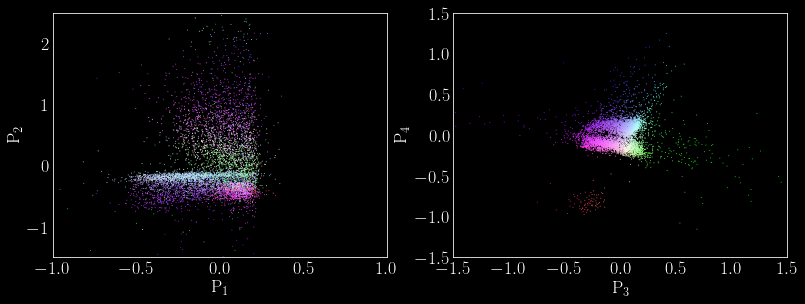

In [136]:
# set up the plot
fig = plt.figure(figsize=(12, 9), facecolor='k')
fig.subplots_adjust(left=0.1, right=0.95, wspace=0.2,
                    bottom=0.1, top=0.93)

# plot the color-color plot
ax1 = black_bg_subplot(223)
ax1.scatter(P1, P2, c=colorP, s=0.9, lw=0)
ax1.set_xlim(-1.0, 1.0)
ax1.set_ylim(-1.5, 2.5)
ax1.set_xlabel(r'${\rm P_1}$', color='w')
ax1.set_ylabel(r'${\rm P_2}$', color='w')

# plot the A vs. logP plot
ax2 = black_bg_subplot(224)
ax2.scatter(P3, P4, c=colorP, s=0.9, lw=0)
ax2.set_xlim(-1.5, 1.5)
ax2.set_ylim(-1.5, 1.5)
ax2.set_xlabel(r'${\rm P_3}$', color='w')
ax2.set_ylabel(r'${\rm P_4}$', color='w')

plt.show()

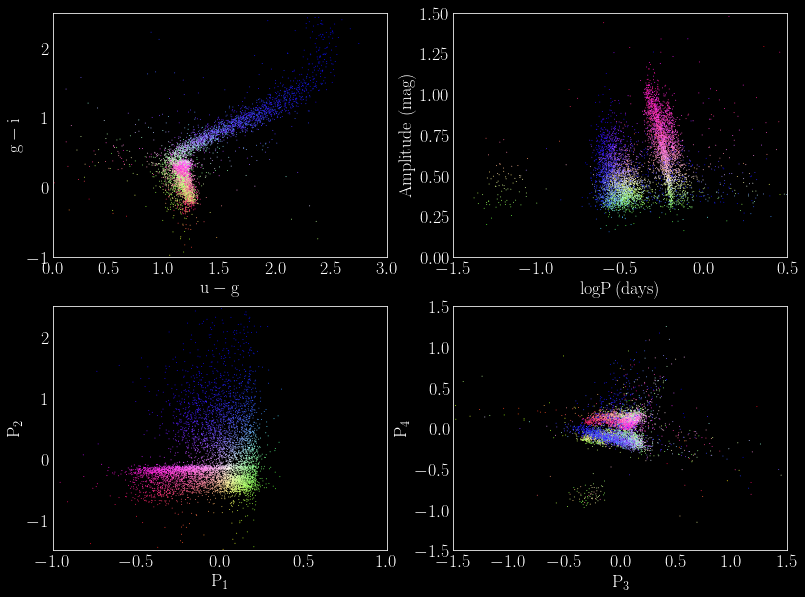

In [137]:
## now use principal coordinates P1 and P2 to define color
P1norm = P1/3.0
P2norm = P2/3.0 
# for the last four parameters, see compute_color2 above
colorP12 = compute_color2(P1norm, P2norm, 5.0, 0.8, 2.0, 1.2)

# set up the plot
fig = plt.figure(figsize=(12, 9), facecolor='k')
fig.subplots_adjust(left=0.1, right=0.95, wspace=0.2,
                    bottom=0.1, top=0.93)

# plot the color-color plot
ax1 = black_bg_subplot(221)
ax1.scatter(ug, gi, c=colorP12, s=0.9, lw=0)
ax1.set_xlim(0.0, 3.0)
ax1.set_ylim(-1.0, 2.5)
ax1.set_xlabel(r'${\rm u-g}$', color='w')
ax1.set_ylabel(r'${\rm g-i}$', color='w')

# plot the A vs. logP plot
ax2 = black_bg_subplot(222)
ax2.scatter(logP, A, c=colorP12, s=0.9, lw=0)
ax2.set_xlim(-1.5, 0.5)
ax2.set_ylim(0.0, 1.5)
ax2.set_xlabel(r'${\rm logP \, (days)}$', color='w')
ax2.set_ylabel(r'${\rm Amplitude \,\, (mag)}$', color='w')

# plot the color-color plot
ax1 = black_bg_subplot(223)
ax1.scatter(P1, P2, c=colorP12, s=0.9, lw=0)
ax1.set_xlim(-1.0, 1.0)
ax1.set_ylim(-1.5, 2.5)
ax1.set_xlabel(r'${\rm P_1}$', color='w')
ax1.set_ylabel(r'${\rm P_2}$', color='w')

# plot the A vs. logP plot
ax2 = black_bg_subplot(224)
ax2.scatter(P3, P4, c=colorP12, s=0.9, lw=0)
ax2.set_xlim(-1.5, 1.5)
ax2.set_ylim(-1.5, 1.5)
ax2.set_xlabel(r'${\rm P_3}$', color='w')
ax2.set_ylabel(r'${\rm P_4}$', color='w')

plt.show()

## what do you conclude? 